In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score



In [2]:
df_ml = pd.read_csv('../data/raw/df_ml.csv')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321193 entries, 0 to 1321192
Data columns (total 93 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID_partida           1321193 non-null  int64  
 1   jugada_num           1321193 non-null  int64  
 2   SAN                  1321193 non-null  object 
 3   eval                 1316155 non-null  float64
 4   turno                1321193 non-null  object 
 5   Resultado            1321193 non-null  int64  
 6   White                1321193 non-null  object 
 7   Black                1321193 non-null  object 
 8   WhiteElo             1321193 non-null  int64  
 9   BlackElo             1321193 non-null  int64  
 10  ECO                  1321193 non-null  object 
 11  ECO_Family           1321193 non-null  object 
 12  TimeControl          1321193 non-null  object 
 13  Termination          1321193 non-null  object 
 14  calidad_jugada       1321193 non-null  object 
 15

In [3]:
# Había nulos, en eval_anterior era nulo porque corresponden a la primera jugada y entonces no había jugada anterior
# En eval lo rellenamos con 0 que es neutro
df_ml['eval_anterior'] = df_ml['eval_anterior'].fillna(0)
df_ml['eval'] = df_ml['eval'].fillna(0)

exclude_cols = [col for col in df_ml.columns if col.startswith('FEN_')]
exclude_cols += ['ID_partida', 'jugada_num', 'SAN', 'White', 'Black', 'turno', 'ECO','Termination',
                 'turno.1']

df_ml = df_ml.drop(exclude_cols, axis=1)

# Variables categóricas a convertir en dummies
categorical_cols = ['ECO_Family', 'TimeControl', 'calidad_jugada']

# Metodo para variables categóricas
df_model = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

In [4]:
# Modelo 1
# Linear Regression 

X = df_model.drop(columns=['BlackElo'])
y = df_model['BlackElo']

# Noramalizamos datos para ver si mejora el modelo
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

y_pred = modelo_lr.predict(X_test)
print('Resultados Linear Regression')
print('MAE LR:', mean_absolute_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


Resultados Linear Regression
MAE LR: 132.39271896551688
R²: 0.32424072846893826


In [5]:
# Modelo 2
# Ridge

ridge = Ridge()

# Parametros GridSearch
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

ridge_grid = GridSearchCV(estimator=ridge,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=5,
                          n_jobs=-1,
                          verbose=3)

# Entrenamiento
ridge_grid.fit(X_train, y_train)

print('Resultados para Ridge')
print('Mejor alpha Ridge:', ridge_grid.best_params_['alpha'])
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print('Resultados Ridge')
print('MAE Ridge:', mean_absolute_error(y_test, y_pred_ridge))
print('R² Ridge:', r2_score(y_test, y_pred_ridge))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Resultados para Ridge
Mejor alpha Ridge: 0.1
Resultados Ridge
MAE Ridge: 132.39274647509825
R² Ridge: 0.324240812634062


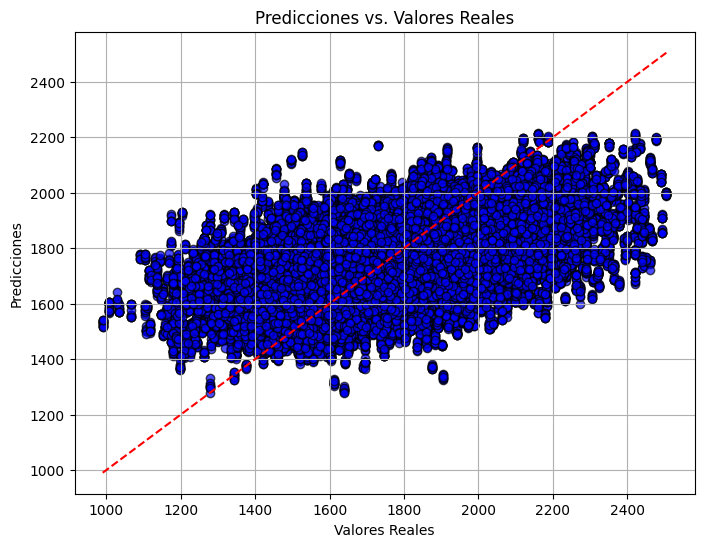

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes 'y_test' y 'y_pred'
# Si no los tienes, reemplaza 'y_test' y 'y_pred' con las variables correspondientes.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


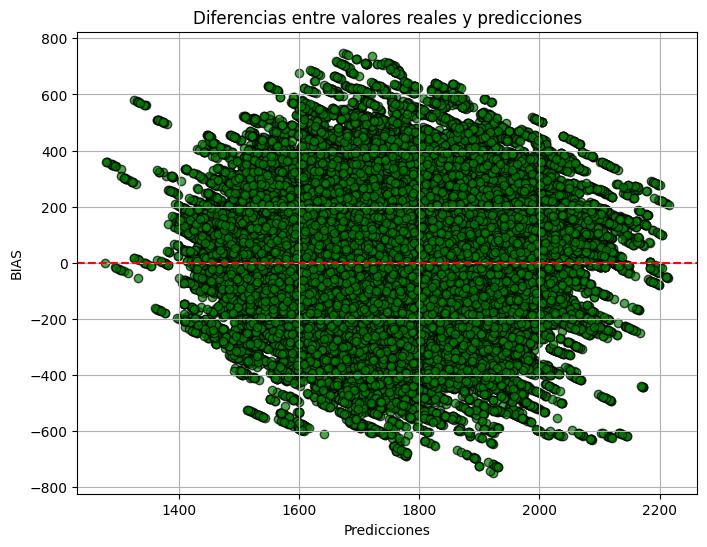

In [9]:
# Calcular residuos
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='green', edgecolors='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Línea en y = 0 para referencia
plt.title('Diferencias entre valores reales y predicciones')
plt.xlabel('Predicciones')
plt.ylabel('BIAS')
plt.grid(True)
plt.show()
